# Purezza dell'ossigeno

Consideriamo la tabella seguente in cui è riportata la purezza dell’ossigeno in un processo di distillazione chimica e la percentuale di idrocarburi presente nel condensatore principale dell’unità di distillazione.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

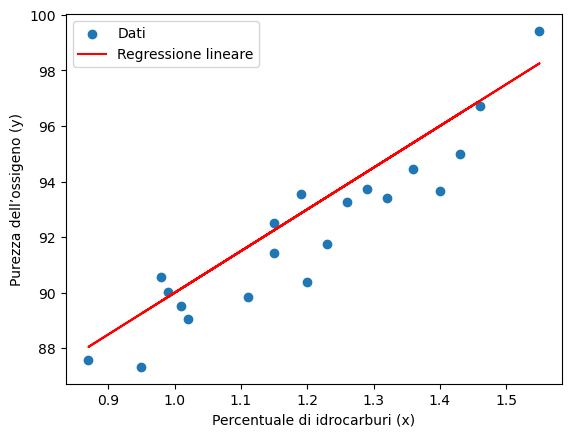

In [2]:
data = np.loadtxt("data.dat")

x = data[:, 0] # livello di idrocarburi
y = data[:, 1] # purità dell'ossigeno
sig2 = 2
n = x.size

# coefficienti di regressione
beta_0 = 75
beta_1 = 15
w = 0 # errore

Y = beta_0 + beta_1*x + w

plt.scatter(x, y, label='Dati')
plt.plot(x, Y, color='red', label='Regressione lineare')

plt.xlabel('Percentuale di idrocarburi (x)')
plt.ylabel('Purezza dell’ossigeno (y)')
plt.legend()
plt.show()

x_bar: 1.2
y_bar: 92.16
b0: 74.2833142403948
b1: 14.947479732111383


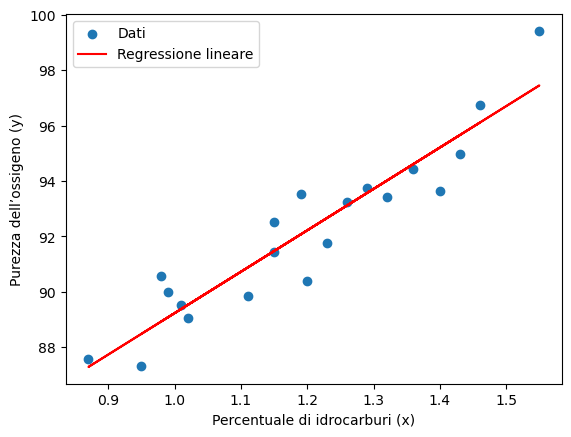

In [10]:
x_bar = np.mean(x)
print(f'x_bar: {round(x_bar, 2)}')

y_bar = np.mean(y)
print(f'y_bar: {round(y_bar, 2)}')

sig_x = np.sqrt(np.sum((x-x_bar)**2)/n)
sig_xy = sum((x-x_bar)*(y-y_bar))/n

b0 = y_bar - sig_xy/(sig_x**2) * x_bar
print(f'b0: {b0}')

b1 = sig_xy/(sig_x**2)
print(f'b1: {b1}')

Y = b0 + b1*x + w

plt.scatter(x, y, label='Dati')
plt.plot(x, Y, color='red', label='Regressione lineare')

plt.xlabel('Percentuale di idrocarburi (x)')
plt.ylabel('Purezza dell’ossigeno (y)')
plt.legend()
plt.show()